In [2]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import nltk
from nltk import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [3]:
#Obtain training dataset and testing dataset
X_train = np.load('np_training_data.npy')
df_train=pd.read_csv('facial_expression.csv')
emotions=df_train.emotion
y_train = np.array(emotions)

df_test = pd.read_csv('test.csv')

In [4]:
import nltk
nltk.download('punkt')

In [5]:
#Convert X_test to a numpy ndarray so that it can be used for testing
pixels = df_test.loc[:,'pixels'].values
px = []
for x in pixels : 
    x = word_tokenize(x)
    x = [float(t) for t in x]
    px.append(x)
X_test = np.array(px)
print(X_test.shape)

(1044, 2304)


In [6]:
#Convert Y_test
y_test = df_test.loc[:, 'emotion'].values
print(y_test.shape)

(1044,)


In [7]:
#Modify x_train to 2d
nsamples, nx, ny = X_train.shape
d2_x_train = X_train.reshape((nsamples,nx*ny))
d2_x_train.shape

(26859, 2304)

In [8]:
# Run the training and predicting
clf = KNeighborsClassifier()
clf.fit(d2_x_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN", acc*100)

Accuracy score using KNN 55.3639846743295


In [9]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 60,   7,  32,  13,   2,  15],
       [ 13,  92,  30,  12,  12,  14],
       [ 15,  12, 185,  14,   3,  29],
       [ 20,  17,  31,  79,   8,  31],
       [  8,  11,  13,   9,  74,  11],
       [ 12,  15,  34,  18,   5,  88]])

(6.0, 0.0)

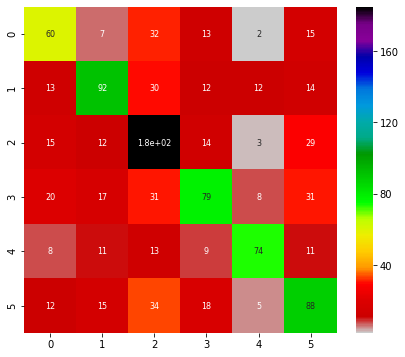

In [10]:
# Plot the confusion matrix by sns
confusion=confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, range(6), range(6))
figure = plt.figure(figsize=(7,6))
axes = sns.heatmap(confusion_df, annot=True,annot_kws={"size": 8},
 cmap=plt.cm.nipy_spectral_r)
axes.set_ylim(sorted(axes.get_xlim(), reverse=True))

In [11]:
#Convert x_test so that it can be plotted
images = X_test.reshape((1044, 48, 48))

In [12]:
#Find all the incorrect predictions by comparing with test data and predicted result
incorrect_predictions = []
for i, (pred, expect) in enumerate(zip(y_pred, y_test)):
 predicted, expected = np.argmax(pred), expect
 if predicted != expected: # prediction was incorrect
     incorrect_predictions.append(
     (i, images[i], predicted, expected))

In [13]:
len(incorrect_predictions) 

915

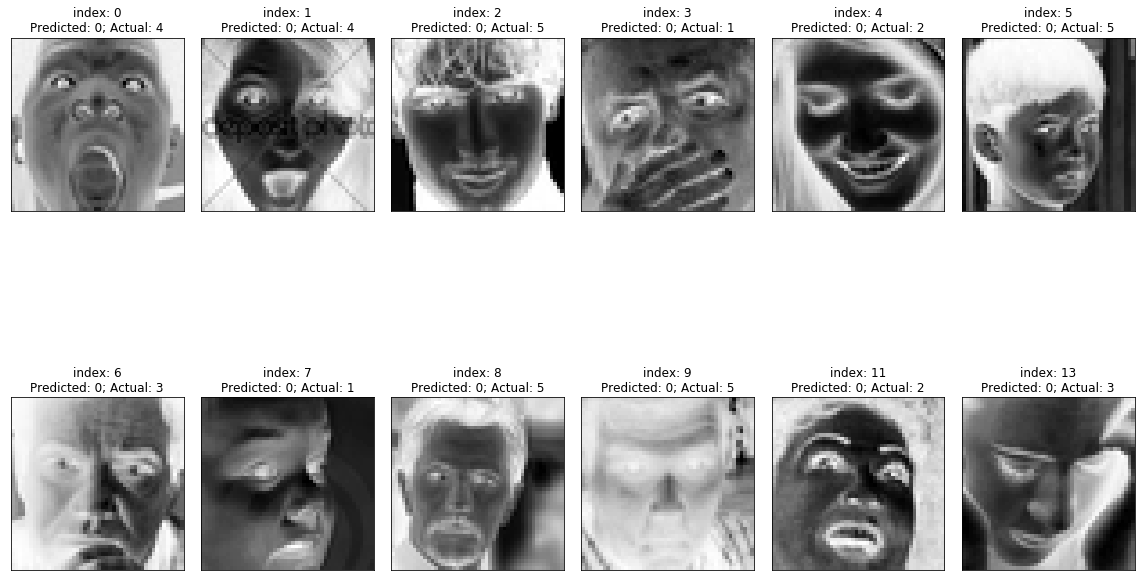

In [14]:
#Plot the first 12 incorrect predictions
figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions[:12]):
 index, image, predicted, expected = item
 axes.imshow(image, cmap=plt.cm.gray_r)
 axes.set_xticks([]) # remove x-axis tick marks
 axes.set_yticks([]) # remove y-axis tick marks
 axes.set_title(f'index: {index}\nPredicted: {predicted}; Actual: {expected}')
plt.tight_layout()

In [15]:
#Question 3

In [16]:
#Modify data formats from knn's format to cnn's format
a, b = X_test.shape
X_test_cnn = X_test.reshape(a, 48, 48, 1)
print("X_test_cnn", X_test_cnn.shape)
c, d = d2_x_train.shape
X_train_cnn = d2_x_train.reshape(c, 48, 48, 1)
print("X_train_cnn", X_train_cnn.shape)


X_test_cnn (1044, 48, 48, 1)
X_train_cnn (26859, 48, 48, 1)


In [17]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [18]:
y_train_cnn = keras.utils.to_categorical(y_train, 7)
y_test_cnn = keras.utils.to_categorical(y_test, 7)

In [19]:
X_test_cnn = X_test_cnn.astype('float32')
X_train_cnn = X_train_cnn.astype('float32')
X_train_cnn /= 255
X_test_cnn /= 255  #normalize the data
print("X_test_cnn", X_test_cnn.shape)
print("X_train_cnn", X_train_cnn.shape)

X_test_cnn (1044, 48, 48, 1)
X_train_cnn (26859, 48, 48, 1)


In [20]:
#Create the model
model = Sequential()

In [21]:
#Build layers
input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

In [22]:
#Compile
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [23]:
#Train
model.fit(X_train_cnn, y_train_cnn,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test_cnn, y_test_cnn))

Train on 26859 samples, validate on 1044 samples
Epoch 1/12
26859/26859 [==============================] - 716s 27ms/step - loss: 1.6574 - accuracy: 0.3480 - val_loss: 1.8886 - val_accuracy: 0.1801
Epoch 2/12
26859/26859 [==============================] - 677s 25ms/step - loss: 1.3195 - accuracy: 0.4859 - val_loss: 1.3628 - val_accuracy: 0.4713
Epoch 3/12
26859/26859 [==============================] - 667s 25ms/step - loss: 1.1290 - accuracy: 0.5632 - val_loss: 1.1973 - val_accuracy: 0.5556
Epoch 4/12
26859/26859 [==============================] - 654s 24ms/step - loss: 0.9873 - accuracy: 0.6276 - val_loss: 0.9905 - val_accuracy: 0.6264
Epoch 5/12
26859/26859 [==============================] - 671s 25ms/step - loss: 0.8637 - accuracy: 0.6762 - val_loss: 0.7680 - val_accuracy: 0.7184
Epoch 6/12
26859/26859 [==============================] - 669s 25ms/step - loss: 0.7326 - accuracy: 0.7280 - val_loss: 0.6789 - val_accuracy: 0.7596
Epoch 7/12
26859/26859 [==============================] -

In [24]:
loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn)

1044/1044 [==============================] - 7s 6ms/step


In [25]:
print("accuracy:", accuracy)

accuracy: 0.9367815852165222


In [53]:
y_test_cnn.shape

(1044, 7)

In [26]:
#Convert y_test to single digits for making the confusion matrix
rounded_y_test_cnn=np.argmax(y_test_cnn, axis=1)
rounded_y_test_cnn[10]

0

In [27]:
#Confusion Matrix
predictions_cnn = model.predict(X_test_cnn)
np.argmax(predictions_cnn[10])
y_pred_cnn = [np.argmax(predictions_cnn[num]) for num in range(len(y_test_cnn))]
confusion_cnn = confusion_matrix(rounded_y_test_cnn,y_pred_cnn) 

(6.0, 0.0)

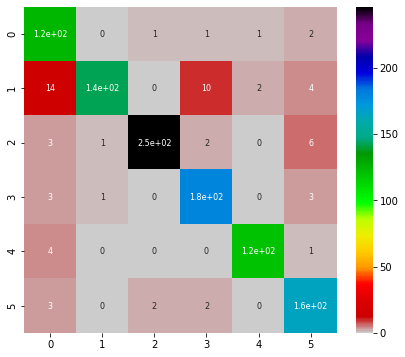

In [28]:
# Plot the confusion matrix
confusion_df_cnn = pd.DataFrame(confusion_cnn, range(6), range(6))
figure_cnn = plt.figure(figsize=(7,6))
axes_cnn = sns.heatmap(confusion_df_cnn, annot=True,annot_kws={"size": 8},
 cmap=plt.cm.nipy_spectral_r)
axes_cnn.set_ylim(sorted(axes_cnn.get_xlim(), reverse=True))

In [29]:
X_test_cnn.shape

(1044, 48, 48, 1)

In [30]:
#Convert data format so that it can be plotted
images_cnn = X_test_cnn.reshape((1044, 48, 48))
incorrect_predictions_cnn = []
#Find all the incorrect predictions by comparing with test data and predicted result
for i, (pred, expect) in enumerate(zip(predictions_cnn, rounded_y_test_cnn)):
    predicted, expected = np.argmax(pred), expect
    if predicted != expected:
        incorrect_predictions_cnn.append(
             (i, images_cnn[i], predicted, expected))

In [31]:
len(incorrect_predictions_cnn)

66

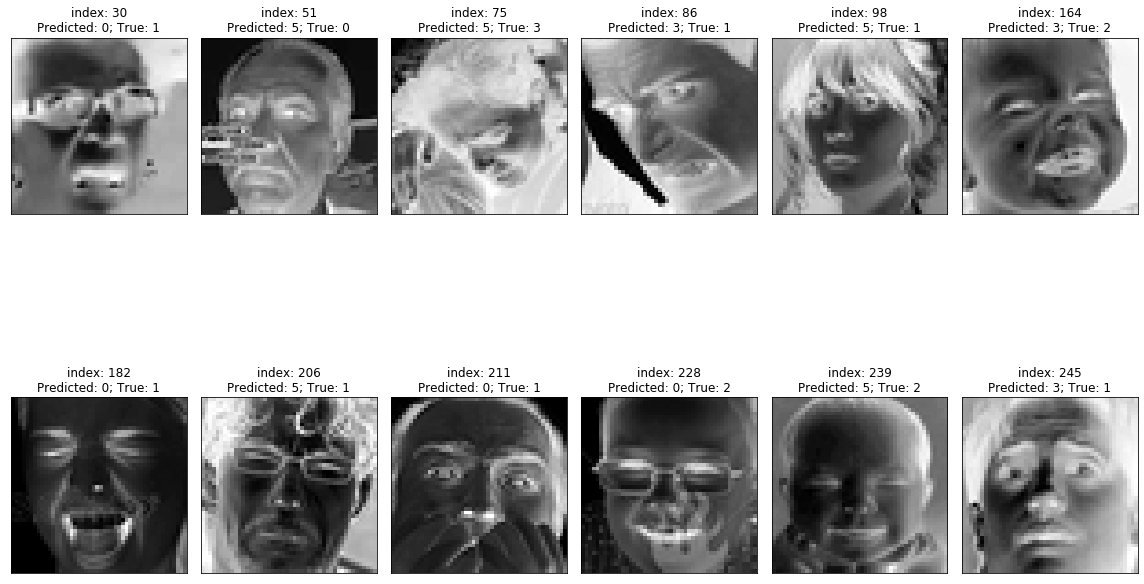

In [32]:
#Plot the first 12 incorrect predictions
figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions_cnn):
 index, image, predicted, expected = item
 axes.imshow(image, cmap=plt.cm.gray_r)
 axes.set_xticks([]) # remove x-axis tick marks
 axes.set_yticks([]) # remove y-axis tick marks
 axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

In [33]:
# Question5

In [34]:
import matplotlib.image as mpimg
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

In [35]:
img1 = mpimg.imread('Hulk.JPG')
image1 = color.rgb2grey(img1)
image_resized1 = resize(image1, (48, 48), anti_aliasing=False) # False maximize the contrast
image_inverse1 = (1-image_resized1)
image_final1 = (image_inverse1-image_inverse1.min()) * 16 / (image_inverse1.max()-image_inverse1.min())

In [36]:
img2 = mpimg.imread('5.JPG')
image2 = color.rgb2grey(img2)
image_resized2 = resize(image2, (48, 48), anti_aliasing=False) # False maximize the contrast
image_inverse2 = (1-image_resized2)
image_final2 = (image_inverse2-image_inverse2.min()) * 16 / (image_inverse2.max()-image_inverse2.min())

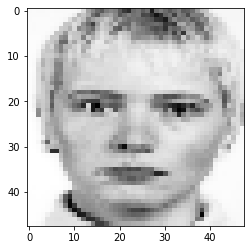

In [37]:
plt.imshow(image_final2, cmap='Greys') 

In [65]:
num_image_1 = image_final1.flatten()
num_image_2 = image_final2.flatten()
X_test_real=[num_image_1, num_image_2,]
y_test_real = [0, 5]

In [66]:
#Convert data format
X_test_real = np.asarray(X_test_real, dtype=np.float32)
X_test_real = X_test_real.reshape(-1,48,48,1)
X_test_real.shape

(2, 48, 48, 1)

In [68]:
#Predict
predictions_real = model.predict(X_test_real)
predictions_real
y_test_real = np.asarray(y_test_real, dtype=np.float32)
y_test_real.shape

(2,)

In [70]:
images_real = X_test_real.reshape((2, 48, 48))
show_predictions_real = []
#Find the number of correct predictions by comparing  test data and predicted result
for i, (pred, expect) in enumerate(zip(predictions_real, y_test_real)):
    predicted, expected = np.argmax(pred), expect
    if predicted == expected:
        show_predictions_real.append(
             (i, images_real[i], predicted, expected))

In [72]:
len(predictions_real)

2

In [ ]:
# Since both the 2 predictions are correct, the trained model successfully predicts the emotions for above 2 samples.